# Neo4j Recommendation System

Equipo: 
* Malváez Flores Axel Daniel
* Peralta Rionda Gabriel Zadquiel
* Licea Becerril Santiago

Este es el notebook de python que utilizaremos para realizar nuestras consultas y búsquedas dentro de nuestra red de neo4j y con la cuál desearemos realizar algoritmos de búsquea y recomendación.

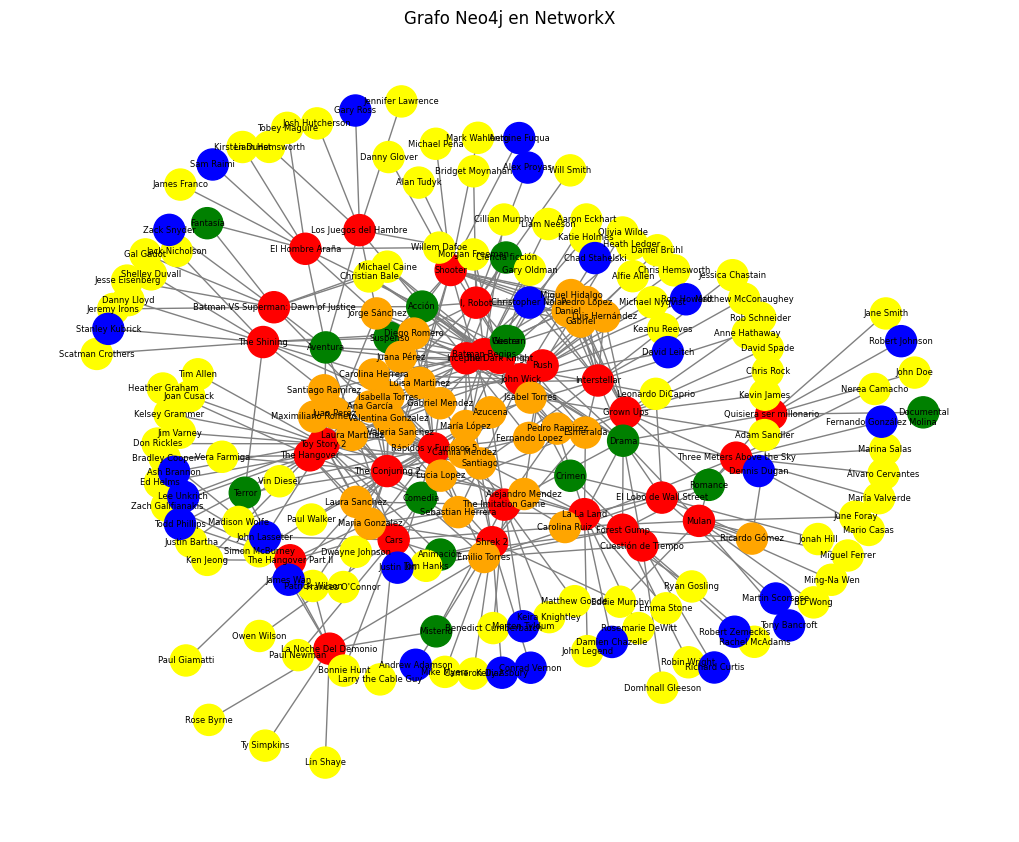

In [14]:
from py2neo import Graph
import networkx as nx
import matplotlib.pyplot as plt

# Conectarse a la base de datos Neo4j
graph = Graph("neo4j://localhost:7689", auth=("neo4j", "contraseña"))

# Definir una consulta Cypher para recuperar nodos y relaciones
query = """
MATCH (n)
RETURN n
"""

# Ejecutar la consulta y obtener los resultados
result = graph.run(query)

# Crear un objeto de grafo en NetworkX
G = nx.Graph()

# Iterar sobre los resultados y agregar nodos al grafo
for record in result:
    properties = record.values()
    node = record["n"]
    node_id = node.identity
    node_nombre = node['nombre']
    tipo = list(properties[0].labels)[0]
    #properties = node.properties
    G.add_node(node_nombre, tipo = tipo) #**properties)

#Obtener las relaciones del grafo y agregarlas al grafo de NetworkX
query_rel = """
MATCH (n)-[r]->(m)
RETURN n, r, m
"""

result_rel = graph.run(query_rel)

for record in result_rel:
    node_start = record["n"]
    node_end = record["m"]
    #rel_properties = record["r"].properties
    G.add_edge(node_start['nombre'], node_end['nombre'], )#**rel_properties)

color_map = {'Pelicula': 'red', 'Director': 'blue', 'Genero': 'green', 'Actor': 'yellow', 'Usuario' : 'orange'}
node_colors = [color_map[G.nodes[n]['tipo']] for n in G.nodes]

# Visualizar el grafo utilizando NetworkX y Matplotlib
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color='gray', font_size=6, font_color='black')
plt.title("Grafo Neo4j en NetworkX")
plt.show()

### Análisis de centralidad de la red

Los algoritmos de centralidad son útiles para identificar nodos importantes en la red. Puedes utilizar algoritmos como la centralidad de grado (degree centrality) para identificar los nodos con más conexiones, o la centralidad de intermediación (betweenness centrality) para identificar los nodos que conectan diferentes partes de la red. Esto podría ayudarte a identificar los directores más influyentes, los géneros más populares, los actores más conectados, etc.

Centralidad de grado para The Conjuring 2 : 0.12807881773399016
Centralidad de grado para Rápidos y Furiosos 5 : 0.11822660098522167
Centralidad de grado para Toy Story 2 : 0.11822660098522167
Centralidad de grado para The Hangover : 0.09359605911330049
Centralidad de grado para Inception : 0.08866995073891626
Centralidad de grado para Batman Begins : 0.08866995073891626
Centralidad de grado para John Wick : 0.08374384236453201
Centralidad de grado para I, Robot : 0.07881773399014778
Centralidad de grado para Interstellar : 0.07389162561576355
Centralidad de grado para Grown Ups : 0.07389162561576355
Centralidad de grado para The Imitation Game : 0.07389162561576355
Centralidad de grado para Shooter : 0.06896551724137931
Centralidad de grado para Shrek 2 : 0.06896551724137931
Centralidad de grado para Rush : 0.06896551724137931
Centralidad de grado para The Dark Knight : 0.06896551724137931
Centralidad de grado para La La Land : 0.06896551724137931
Centralidad de grado para Drama : 0.0

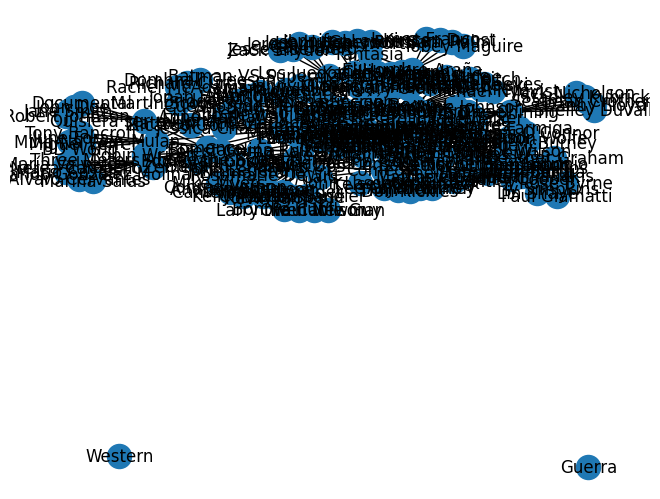

In [23]:
# Calcular centralidad de grado
degree_centrality = nx.degree_centrality(G)

# Imprimir resultados
ordenados = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

for node, centrality in ordenados:
    print(f"Centralidad de grado para {node} : {centrality}")

# Visualizar la distribución de centralidad de grado
nx.draw(G, with_labels=True)

In [28]:
# Calcular PageRank
pagerank = nx.pagerank(G)

scores = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Imprimir resultados
for node, score in scores:
    print(f"PageRank de {node}: {score}")

PageRank de Toy Story 2: 0.027923777791786484
PageRank de The Conjuring 2: 0.027726701896497574
PageRank de Rápidos y Furiosos 5: 0.025321728080308335
PageRank de The Hangover: 0.020140086352227585
PageRank de John Wick: 0.02002948885562749
PageRank de Batman Begins: 0.019885550532597888
PageRank de Grown Ups: 0.018531020000408523
PageRank de Inception: 0.017815963966168514
PageRank de I, Robot: 0.01779284804153913
PageRank de Shrek 2: 0.017585310730697464
PageRank de La La Land: 0.01737293856882074
PageRank de The Imitation Game: 0.01731444309427313
PageRank de Interstellar: 0.016290011465887575
PageRank de Rush: 0.01609420464020834
PageRank de Shooter: 0.015803132009210345
PageRank de The Dark Knight: 0.015464728014367705
PageRank de The Shining: 0.01534626018771702
PageRank de Drama: 0.015133100416061192
PageRank de Mulan: 0.015090777251206102
PageRank de Three Meters Above the Sky: 0.015013602594748472
PageRank de Batman VS Superman: Dawn of Justice: 0.013614334117460535
PageRank d

In [29]:
len(G.nodes)

204